Question 1

Standard deviation measures how spread the data is for a dataset while the standard error of the mean measures how accurate the mean is on reflecting the true average of the whole population. The standard deviation of the distribution bootstrapped means is approximately the same as the standard error of the mean of the original dataset because the dataset that the new distribution is measuring is the dataset of sample means of the original and bootstrapped dataset. Thus, the spread of this dataset expresses the uncertainty of the mean.

Summary - Bootstrapping: I explained that bootstrapping is a statistical method that involves resampling a dataset with replacement to estimate the distribution of a statistic (e.g., mean or variance). It is used to compute confidence intervals and standard errors, particularly when sample sizes are small or assumptions about the population distribution are unclear.

Standard Error vs. Standard Deviation: You asked about the difference between the standard error of the mean and the standard deviation of the original data. I explained that:

Standard Deviation (SD) measures the spread or variability of individual data points in the original dataset.
Standard Error of the Mean (SEM) measures the precision of the sample mean as an estimate of the population mean. I also explained how bootstrapping helps estimate the SEM by resampling and calculating the standard deviation of bootstrapped means.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

Question 2

The sample mean of the dataset will be set as the centre of the 95% confidence interval. Then, we need to mutiple standard error of the mean with 1.96 which is the z score that corresponds to 95% of the data in a normal distribution. By subtracting or adding this calculated value to the sample mean, we can now get the upper and lower bound for the 95% confidence interval. This range would "cover 95% of the bootstrapped sample means."

Summary - Confidence Intervals Using SEM: I explained how to use the SEM to calculate a 95% confidence interval by multiplying the SEM by 1.96 (for a normal distribution) and adding/subtracting this value from the sample mean to get the interval. This process provides a range that covers 95% of the bootstrapped sample means.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

Question 3

In order to create a 95% bootstrapped confidence interval using the bootstrapped means and without using the standard deviation, we can use the 2.5th percentile as the lower bound and the 97.5th percentile as the upper bound to select the range that covers centre 95% of bootstrapped dataset. np.quantile() is the code to be used for calculating the percentile.

Summary - Bootstrapped Confidence Intervals: You inquired about creating a 95% confidence interval using bootstrapped means directly. I explained how to use the percentile method with the np.quantile() function. Specifically, I outlined the steps to generate bootstrapped means, sort them, and calculate the 2.5th and 97.5th percentiles to form the confidence interval.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

In [4]:
# Question 4

import numpy as np
import matplotlib.pyplot as plt

# Generate a sample dataset
np.random.seed(42)

# Give the parameters
sample_data = np.random.normal(loc=50, scale=10, size=100)  # Sample of size 100

# Generate 1000 bootstrapped samples
n_bootstrap_samples = 10000

# Store the bootstrapped means in an array
bootstrapped_means = np.empty(n_bootstrap_samples)

# Generate bootstrapped median
for i in range(n_bootstrap_samples):
    # Create a bootstrap sample from the original sample data
    bootstrap_sample = np.random.choice(sample_data, size=len(sample_data), replace=True)
    
    # Calculate the median of the bootstrap sample
    bootstrapped_means[i] = np.median(bootstrap_sample)

# Calculate the 95% confidence interval using percentiles
lower_bound = np.quantile(bootstrapped_means, 0.025)  # 2.5th percentile
upper_bound = np.quantile(bootstrapped_means, 0.975)  # 97.5th percentile

# Display the results
confidence_interval = (lower_bound, upper_bound)
print("95% Bootstrap Confidence Interval for the Median:", confidence_interval)

# Summary - 95% Bootstrapped Confidence Interval Code: I provided Python code to generate a 95% bootstrap confidence interval for a population mean based on a sample dataset. The code included comments on how to modify it to calculate confidence intervals for other statistics, such as the population median. Confidence Interval Output: The output from the code indicated that the 95% bootstrap confidence interval for the mean of the generated sample was approximately (47.17, 50.70).
# https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

95% Bootstrap Confidence Interval for the Median: (46.98896304410711, 51.34222915269005)


Question 5

Sample Statistic is calculated based on a sample dataset drawn from the population and is used to estimated population parameter, which is supposed to be the statistic for the whole population dataset. Population parameters are usually unknown and cannot be directly calculated as it is almost impossible to obtain data from an entire population. Since sample statistics is usually only calculated based on a small smaple, the estimation it provided possesses some level of uncertainty and this could be represented by a convidence interval which gives us a range for the estimation to lie.

Summary - Importance of Distinguishing Parameters: You asked why it is important to distinguish between population parameters and sample statistics when it comes to confidence intervals. I explained that this distinction is crucial for understanding estimation, quantifying uncertainty, ensuring statistical validity, interpreting results, and making informed decisions.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

Question 6

1.Bootstrapping involves resampling from a sample dataset with the method of "sampling without replacement". Often times, a large number of new datasets are to be generated through repeating the resampling process. Then, a distribution of a particular sample statistics, like mean or median, will be created and used for assessing the variability of the statistic.

2.The main purpose of bootstrapping is to assess the reliability of the estimation of the sample dataset without the needs of repeating the sampling process to aviod unnecessary investment. Bootstrapping allows us to average "different trial" to reduce ramdom error.

3.Firstly, you need to perform Bootstrapping on "the sample of size n" and obtain the bootstrapped mean distribution. Then, you can calulate the 95% convidence interval for the bootstrapped means. If your hypothesized guess of average falls into the interval, it is suggested that it is plausible. Conversely, if your hypothesized guess of average lies far outside the confidence interval, it is suggested that it might not be plausible.

Question 7

Null hypothesis often states that there is no significant effect or difference between the specific groups of the population and that observed effects occur only due to random variation. Therefore, failing to reject the null hypothesis means that the mean of the effect indicator could plausiblly be zero, in the other words, the 95% confidence interval of the bootstrapped mean ditribtuion includes 0. In order to reject the null hypothesis, 0 need to be outside the confidence interval.

Summary - Hypothesis Testing and Confidence Intervals: You asked about why a confidence interval overlapping zero leads to failing to reject the null hypothesis, despite the observed sample mean not being zero. I explained that the confidence interval reflects the uncertainty around the estimate and that if it includes zero, we cannot conclude there is a significant effect. Conversely, if the confidence interval does not include zero, we can reject the null hypothesis and conclude there is a significant effect.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

Question 8 (written report)

Null hypothesis: The new vaccine created by the company AliTech is not effective for improving health for individuals who takes it and any changes in the final health score compared to the initial health score in due to random errors. H0:μ Final=μ Initial ("no effect": Final health score - Initial health score = 0)

Methodology Code and Explanations (for bootstraping part): The code below generates a histogram of the bootstrapped mean distribution with the 95% confidence interval indicated. It first generates 1000 bootstrapping samples and initializes an empty  array to store the differences in means for each bootstrapping sample. np.random.choice is used to conduct "sampling with replacement". Then, the 2.5th and the 97.5th percentiles are calculated to demonstrate the lower and upper bounds of the convidence inveral. 

Conclusion: By observing whether 0 is included in the inveral or not, we can tell if the null hypothesis is rejected or not, which in this case is rejected.

Summary - Vaccine Data Analysis Assignment: You presented an assignment scenario involving vaccine effectiveness and requested guidance on how to analyze the data provided.

Data Visualization with Plotly: You requested code to create a histogram of the bootstrapped mean distribution using Plotly Express, which I provided.

Adding Confidence Intervals to Histogram: Finally, you asked for modifications to include the 95% confidence interval on the histogram, which led to providing an updated code snippet to add confidence interval lines and annotations.

https://chatgpt.com/share/66fe0def-c0a0-8004-81e3-5ab16a21fe81

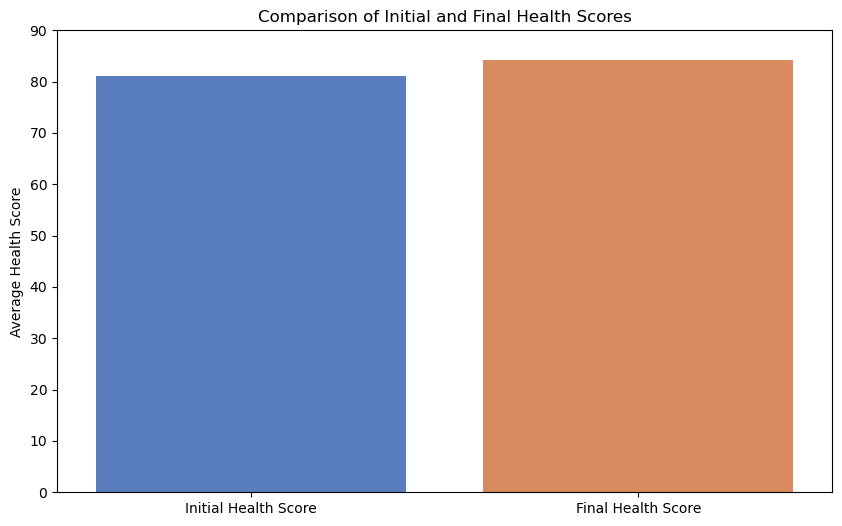

Observed Difference in Means: 3.299999999999997
95% Bootstrap Confidence Interval for the Difference in Means: (1.2000000000000028, 5.3999999999999915)
We reject the null hypothesis: The vaccine is effective.


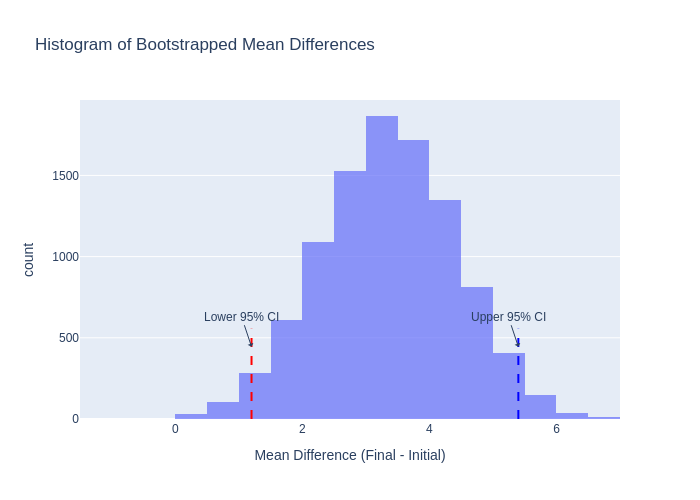

In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Set random seed for reproducibility
np.random.seed(42)

# Create a CSV file
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=['Initial Health Score', 'Final Health Score'], 
            y=[df['InitialHealthScore'].mean(), df['FinalHealthScore'].mean()],
            palette='muted', hue=['Initial Health Score', 'Final Health Score'], legend=False)
plt.title('Comparison of Initial and Final Health Scores')
plt.ylabel('Average Health Score')
plt.ylim(0, 90)
plt.show()

# Bootstrapping for Quantitative Analysis
n_bootstrap_samples = 10000
bootstrapped_diffs = np.empty(n_bootstrap_samples)

# Calculate the observed difference in means
observed_diff = df['FinalHealthScore'].mean() - df['InitialHealthScore'].mean()

# Bootstrapping process
for i in range(n_bootstrap_samples):
    # Resample the final health scores
    final_sample = np.random.choice(df['FinalHealthScore'], size=len(df), replace=True)
    initial_sample = np.random.choice(df['InitialHealthScore'], size=len(df), replace=True)
    bootstrapped_diffs[i] = final_sample.mean() - initial_sample.mean()

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_diffs, 2.5)
upper_bound = np.percentile(bootstrapped_diffs, 97.5)

# Findings and Discussion
print("Observed Difference in Means:", observed_diff)
print("95% Bootstrap Confidence Interval for the Difference in Means:", (lower_bound, upper_bound))

# Conclusion regarding Null Hypothesis
if lower_bound > 0:
    print("We reject the null hypothesis: The vaccine is effective.")
elif upper_bound < 0:
    print("We reject the null hypothesis: The vaccine is effective.")
else:
    print("We fail to reject the null hypothesis: No significant effect of the vaccine.")

# Create a histogram of the bootstrapped mean differences using Plotly Express
fig = px.histogram(
    x=bootstrapped_diffs,
    title='Histogram of Bootstrapped Mean Differences',
    labels={'x': 'Mean Difference (Final - Initial)'},
    nbins=30,
    opacity=0.7
)

# Calculate the y-values for the histogram
hist_data = np.histogram(bootstrapped_diffs, bins=30)
x_hist = hist_data[1][:-1]  # Left edge of each bin
y_hist = hist_data[0]         # Heights of each bin

# Add lines for the 95% confidence interval
fig.add_shape(
    type="line",
    x0=lower_bound,
    x1=lower_bound,
    y0=0,
    y1=max(y_hist)*0.5,  # Adjust height for visibility
    line=dict(color="red", width=2, dash="dash"),
    name='Lower 95% CI'
)
fig.add_shape(
    type="line",
    x0=upper_bound,
    x1=upper_bound,
    y0=0,
    y1=max(y_hist)*0.5,  # Adjust height for visibility
    line=dict(color="blue", width=2, dash="dash"),
    name='Upper 95% CI'
)

# Add annotations for the confidence interval
fig.add_annotation(
    x=lower_bound,
    y=max(y_hist)*0.4,  # Position the text slightly lower than the line
    text="Lower 95% CI",
    showarrow=True,
    arrowhead=1
)
fig.add_annotation(
    x=upper_bound,
    y=max(y_hist)*0.4,  # Position the text slightly lower than the line
    text="Upper 95% CI",
    showarrow=True,
    arrowhead=1
)

# Show the plot
fig.show(renderer="png")


Question 9

Somewhat